In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import numpy as np

(1758,) (1758,) (1758, 1758)


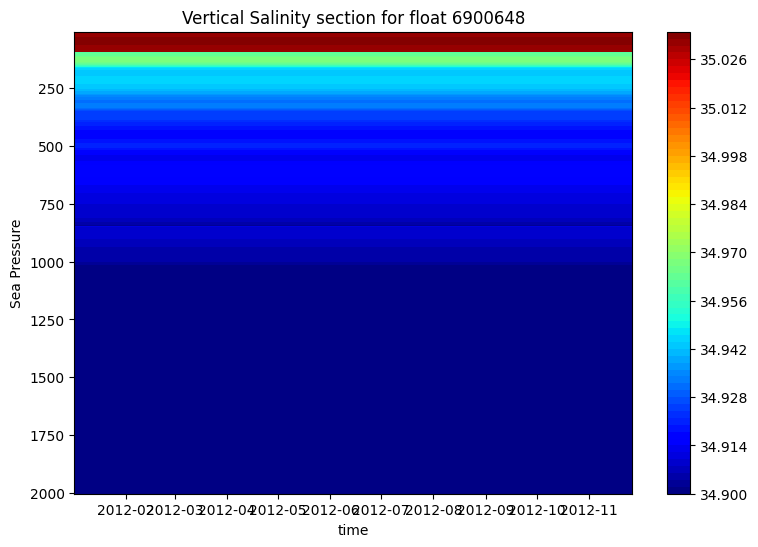

In [4]:
ds = xr.open_dataset("/Users/anjanamanjunath/Desktop/argos_local_hold/data_2012.nc")

# /STAT222-ARGOs/Data/data_2012.nc

b = 6900648

ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)
LAT = ds.data_vars['PLATFORM_NUMBER'][ind].LATITUDE.values

pts = ds.data_vars['PLATFORM_NUMBER'][ind].N_POINTS

TIME=ds.TIME.values[pts]
PSAL=ds.data_vars['PSAL'].values[pts]
PRES=ds.data_vars['PRES'].values[pts]
PRES_IDX=np.arange(5,2005,2000/1758)


PSALI= np.zeros((TIME.shape[0],PRES_IDX.shape[0]))
PSALI.fill(np.nan)

print(np.shape(PRES_IDX), np.shape(PRES), np.shape(PSALI))


for ip in range(0,PRES.shape[0]-1):
    PSALI[ip,:]=np.interp(PRES_IDX[ip],PRES,PSAL)

fig, ax = plt.subplots(figsize=(9,6))

cs=ax.contourf(TIME,PRES_IDX,PSALI,70, cmap="jet")


ax.invert_yaxis()

ax.set_title(f"Vertical Salinity section for float 6900648")
ax.set_xlabel(f"{ds.TIME.standard_name}")
ax.set_ylabel(f"{ds.data_vars['PRES'].long_name}")

cbar=fig.colorbar(cs,ax=ax)

plt.show()